In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# features: sepal length, sepal width, petal length, petal width, class_name

data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_name'])
data

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<BarContainer object of 3 artists>

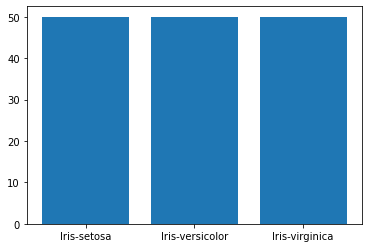

In [3]:
labels = np.unique(data['class_name'])
labels_count = [0, 0, 0]

for row in data.values:
    if row[-1] == 'Iris-setosa':
        labels_count[0] += 1
    elif row[-1] == 'Iris-versicolor':
        labels_count[1] += 1
    else:
        labels_count[-1] += 1

plt.bar(x=labels, height=labels_count)

<AxesSubplot:>

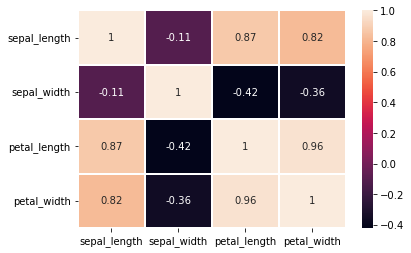

In [4]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, robust=True, linewidths=0.1)

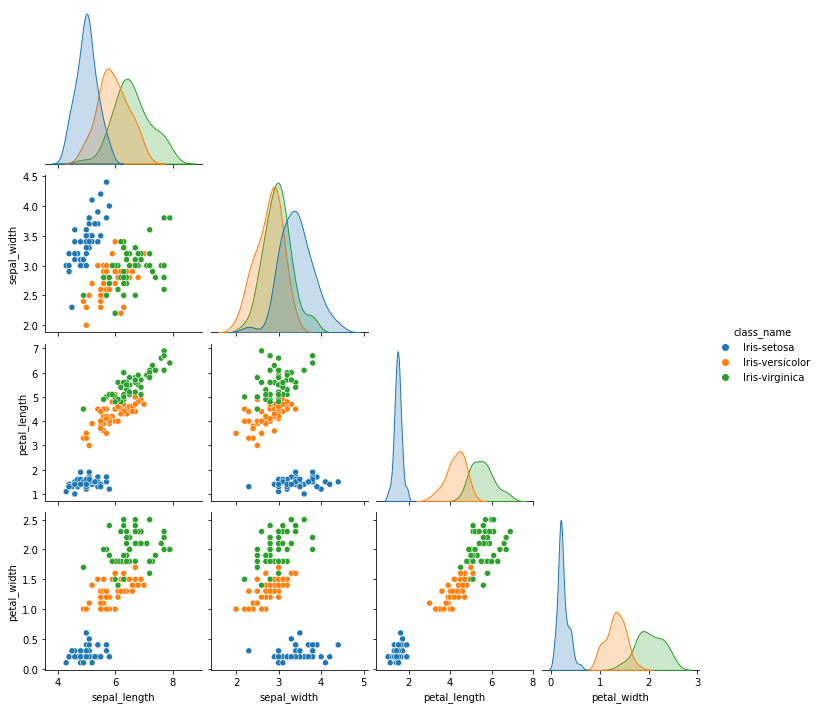

In [5]:
sns.pairplot(data, hue='class_name', corner=True, kind='scatter')

**Based on the scatterplot shown above, we can observe that class name Iris-setosa is easily separable/identifieable when compared to the remianing classes. So the objective here is to design a model capable of extracting features that can seperate and identify key differences between those two overlapping classes.**



**As such a KNN model will be deployed and written from scratch.**

In [6]:
from sklearn.model_selection import train_test_split

# KNN

In [7]:
class KNN_model:
    def __init__(self, pd_dataframe):
        self.dataframe = pd_dataframe
        self.X = self.dataframe.values[:, :-1]
        self.y = self.dataframe.values[:, -1]
        self.class_names = np.unique(self.y)  # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
        
        self.x_cv = None
        self.y_cv = None
        self.x_test = None
        self.y_test = None
        self.x_train = None
        self.y_train = None
        
    def get_x_train(self):
        return self.x_train
    
    def get_x_cv(self):
        return self.x_cv
    
    def get_x_test(self):
        return self.x_test
    
    def get_y_train(self):
        return self.y_train
    
    def get_y_cv(self):
        return self.y_cv
    
    def get_y_test(self):
        return self.y_test
        
    def split_data(self):
        self.x_train, x_, self.y_train, y_ = train_test_split(self.X, self.y, test_size=0.25, shuffle=True, random_state=42)
        self.x_cv, self.x_test, self.y_cv, self.y_test = train_test_split(x_, y_, test_size=0.2, shuffle=True, random_state=42)
        
    def compute_distance(self, row1, row2):
        d = sum([(row2[i] - row1[i]) ** 2 for i in range(len(row1))])
        return np.sqrt(d)
    
    def prediction(self, actual_label, results):
        counter = [0, 0, 0]
        for res in results:
            if res[-1] == 'Iris-setosa':
                counter[0] += 1
            elif res[-1] == 'Iris-versicolor':
                counter[1] += 1
            else:
                counter[2] += 1
        
        if actual_label == self.class_names[np.argmax(counter)]:
            return True
        else:
            False
    
    def get_cross_val_score(self, K=5):
        correct_incorrect = [0, 0]
        for i in range(len(self.x_cv)):
            distances = []
            for j, train in enumerate(self.x_train):
                distances.append([self.compute_distance(row1=self.x_cv[i], row2=train), self.y_train[j]])
            
            distances.sort(key=lambda x:x[0], reverse=False)
            k_samples = distances[:K]
            #print(k_samples)
            #print()
            
            if self.prediction(actual_label=self.y_cv[i], results=k_samples):
                correct_incorrect[0] += 1
            else:
                correct_incorrect[1] += 1
        
        accuracy = correct_incorrect[0] / sum(correct_incorrect)
        error = 1 - accuracy
        
        return accuracy, error
    
            
    def get_testing_score(self, K=5):
        correct_incorrect = [0, 0]
        for i in range(len(self.x_test)):
            distances = []
            for j, train in enumerate(self.x_train):
                distances.append([self.compute_distance(row1=self.x_test[i], row2=train), self.y_train[j]])
            
            distances.sort(key=lambda x:x[0], reverse=False)
            k_samples = distances[:K]
            
            if self.prediction(actual_label=self.y_test[i], results=k_samples):
                correct_incorrect[0] += 1
            else:
                correct_incorrect[1] += 1
        
        accuracy = correct_incorrect[0] / sum(correct_incorrect)
        error = 1 - accuracy
        
        return accuracy, error
    
    

In [8]:
knn_model = KNN_model(pd_dataframe=data)
knn_model.split_data()

print(f"Training Shape: {knn_model.get_x_train().shape},  label: {knn_model.get_y_train().shape}")
print(f"Cross-validation Shape: {knn_model.get_x_cv().shape},  label: {knn_model.get_y_cv().shape}")
print(f"Testing Shape: {knn_model.get_x_test().shape},  label: {knn_model.get_y_test().shape}")

Training Shape: (112, 4),  label: (112,)
Cross-validation Shape: (30, 4),  label: (30,)
Testing Shape: (8, 4),  label: (8,)


In [9]:
cross_val_acc, cross_val_err = knn_model.get_cross_val_score(K=10)
testing_acc, testing_err = knn_model.get_testing_score(K=10)

print(f"Cross-validation Accuracy: {cross_val_acc},  Error: {cross_val_err}")
print(f"Testing Accuracy: {testing_acc},  Error: {testing_err}")


Cross-validation Accuracy: 1.0,  Error: 0.0
Testing Accuracy: 1.0,  Error: 0.0
